In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import import_ipynb
import io

# from ipynb.fs.full.fidelity import fidelity

im = Image.open('house.tif')
f = np.array(im)

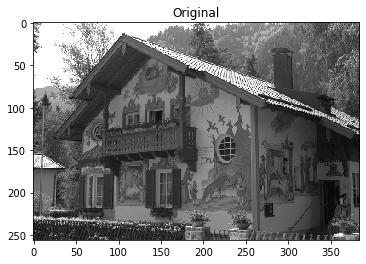

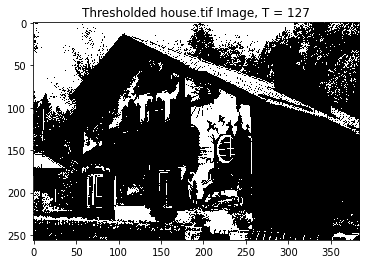

In [2]:
dim1, dim2 = np.shape(f)
T = 127
b = np.zeros((dim1,dim2))

for i in range(dim1):
    for j in range(dim2):
        if f[i,j] > T:
            b[i,j] = 255
        else:
            b[i,j] = 0


plt.figure()
plt.title("Original")
plt.imshow(f,cmap=plt.cm.gray,interpolation='none')            

plt.figure()
plt.title("Thresholded house.tif Image, T = 127")
plt.imshow(b,cmap=plt.cm.gray,interpolation='none')

img_out = Image.fromarray(b.astype(np.uint8))
img_out.save("Threshold.tif")

In [3]:
count = 0
for i in range(dim1):
    for j in range(dim2):
        count += (f[i,j] - b[i,j])**2
        
RMSE = np.sqrt((1/(dim1*dim2))*count)
print("RMSE = ", RMSE)

RMSE =  87.3933165438293


In [4]:
# notes

# gamma un-correction does nothing to the binary image because the fraction
# is either 0 or 1 in the equation, resulting in a 0 or 1 after raising to
# a power

# plt.figure()
# plt.title("Original Un-Corrected")
# plt.imshow(fl,cmap=plt.cm.gray,interpolation='none')            

# plt.figure()
# plt.title("Thresholded Un-Corrected")
# plt.imshow(bl,cmap=plt.cm.gray,interpolation='none'

In [5]:
# def fidelity(f, b):   OLD DO NOT USE
    
#     flpf = np.zeros((dim1,dim2))
#     blpf = np.zeros((dim1,dim2))

#     gamma = 2.2
#     fl = 255*((f/255)**gamma)
#     bl = 255*((b/255)**gamma)
    
#     # define h    
#     sigsq = 2
#     size = 7
#     psfset = np.array([-3, -2, -1, 0, 1, 2, 3])
#     h = np.zeros((size, size))
#     for i in range(size):
#         for j in range(size):
#             h[i,j] = np.exp(-(psfset[i]**2 + psfset[j]**2)/(2*sigsq))
    
#     sumh = np.sum(h)
#     C = 1/sumh
#     h = C*h
    
#     # apply difference equation to each location
#     for m in range(dim1):
#         for n in range(dim2):
            
#             if m >= 4 and m <= dim1-4 and n >= 4 and n <= dim2-4:
#                 count1 = 0
#                 count2 = 0
#                 for k in range(size):
#                     for l in range(size):
#                         count1 += h[k,l]*fl[m+psfset[k],n+psfset[l]]
#                         count2 += h[k,l]*bl[m+psfset[k],n+psfset[l]]
                        
#                 flpf[m,n] = count1
#                 blpf[m,n] = count2
#             else:
#                 flpf[m,n] = fl[m,n]
#                 blpf[m,n] = bl[m,n]
    
    
#     # re-gamma correct
#     ftil = 255*((flpf/255)**(1/3))
#     btil = 255*((blpf/255)**(1/3))
    
#     # calculate fidelity
#     count = 0
#     for i in range(dim1):
#         for j in range(dim2):
#             count += (ftil[i,j] - btil[i,j])**2
            
#     fid = np.sqrt((1/(dim1*dim2))*count)
    
#     return fid

In [6]:
def fidelity(f, b):
    
    flpf = np.zeros((dim1,dim2))
    blpf = np.zeros((dim1,dim2))

    gamma = 2.2
    fl = 255*((f/255)**gamma)
    bl = 255*((b/255)**gamma)
    
    # define h    
    sigsq = 2
    size = 7
    psfset = np.array([-3, -2, -1, 0, 1, 2, 3])
    h = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            h[i,j] = np.exp(-(psfset[i]**2 + psfset[j]**2)/(2*sigsq))
    
    sumh = np.sum(h)
    C = 1/sumh
    h = C*h
    
    # apply difference equation to each location
    for m in range(dim1):
        for n in range(dim2):
            count1 = 0
            count2 = 0
            for k in range(size):
                for l in range(size):
                    if m+psfset[k] < 0 or m+psfset[k] >= dim1 or n+psfset[l] < 0 or n+psfset[l] >= dim2:
                        count1 += 0
                        count2 += 0
                    else:
                        count1 += h[k,l]*fl[m+psfset[k],n+psfset[l]]
                        count2 += h[k,l]*bl[m+psfset[k],n+psfset[l]]
                    
            flpf[m,n] = count1
            blpf[m,n] = count2
            
    
    
    # re-gamma correct
    ftil = 255*((flpf/255)**(1/3))
    btil = 255*((blpf/255)**(1/3))
    
    # calculate fidelity
    count = 0
    for i in range(dim1):
        for j in range(dim2):
            count += (ftil[i,j] - btil[i,j])**2
            
    fid = np.sqrt((1/(dim1*dim2))*count)
    
    return fid

In [7]:
# h prototyping

# sigsq = 2
# size = 7
# psfset = np.array([-3, -2, -1, 0, 1, 2, 3])
# h = np.zeros((size, size))
# for i in range(size):
#     for j in range(size):
#         h[i,j] = np.exp(-(psfset[i]**2 + psfset[j]**2)/(2*sigsq))
        
        
# print(h)
# print(np.sum(h))

# sumh = np.sum(h)
# C = 1/sumh
# h = C*h

# print(h)
# print(np.sum(h))

In [8]:
ftest = fidelity(f, b)

print(ftest)

77.33714917243245
